
Importing the Dependencies

In [5]:
pip install catboost

In [6]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import datetime as dt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from plotly.subplots import make_subplots
from sklearn import metrics

# ML model
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib

Data Collection and Processing

In [8]:
# loading the dataset to pandas DataFrame
weather_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Weather Prediction/seattle-weather.csv')

In [9]:
type(weather_dataset)

pandas.core.frame.DataFrame

In [10]:
# first 5 rows of the dataframe
weather_dataset.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,1/1/2012,0.0,12.8,5.0,4.7,drizzle
1,1/2/2012,10.9,10.6,2.8,4.5,rain
2,1/3/2012,0.8,11.7,7.2,2.3,rain
3,1/4/2012,20.3,12.2,5.6,4.7,rain
4,1/5/2012,1.3,8.9,2.8,6.1,rain


In [11]:
# last 5 rows of the dataframe
weather_dataset.tail()

,date,precipitation,temp_max,temp_min,wind,weather
2917,12/27/2015,8.6,4.4,1.7,2.9,rain
2918,12/28/2015,1.5,5.0,1.7,1.3,rain
2919,12/29/2015,0.0,7.2,0.6,2.6,fog
2920,12/30/2015,0.0,5.6,-1.0,3.4,sun
2921,12/31/2015,0.0,5.6,-2.1,3.5,sun


In [12]:
# number of rows and columns
weather_dataset.shape

(2922, 6)

In [13]:
# the name of the columns of dataframe
weather_dataset.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [14]:
# Describe the data
weather_dataset.describe()

,precipitation,temp_max,temp_min,wind
count,2922.000000,2922.000000,2922.000000,2922.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.679051,7.348500,5.022144,1.437579
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [15]:
# Describe the data with transpose
weather_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
precipitation,2922.0,3.029432,6.679051,0.0,0.0,0.0,2.8,55.9
temp_max,2922.0,16.439083,7.348500,-1.6,10.6,15.6,22.2,35.6
temp_min,2922.0,8.234771,5.022144,-7.1,4.4,8.3,12.2,18.3
wind,2922.0,3.241136,1.437579,0.4,2.2,3.0,4.0,9.5


In [16]:
# getting imformation about dataset
weather_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2922 non-null   object 
 1   precipitation  2922 non-null   float64
 2   temp_max       2922 non-null   float64
 3   temp_min       2922 non-null   float64
 4   wind           2922 non-null   float64
 5   weather        2922 non-null   object 
dtypes: float64(4), object(2)
memory usage: 137.1+ KB


In [17]:
# checking the number of missing values
weather_dataset.isnull()

,date,precipitation,temp_max,temp_min,wind,weather
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2917,False,False,False,False,False,False
2918,False,False,False,False,False,False
2919,False,False,False,False,False,False
2920,False,False,False,False,False,False


In [18]:
# number of missing values in each column
weather_dataset.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

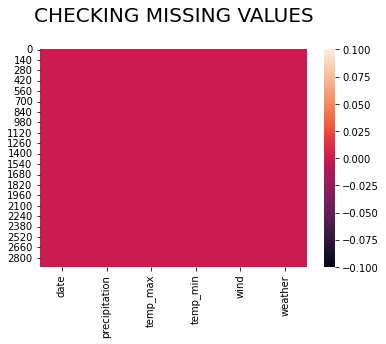

In [19]:
# Checking the number of missing values using heatmap
sns.heatmap(weather_dataset.isnull()) # import seaborn as sns
title = 'Checking missing values\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

No missing values or null values in this dataframe,
For null values we have to replace or mean or median or delete

replacing the null values with mean of single column,
1. weather_dataset['col_name'].fillna(weather_dataset.col_name.mean(), inplace=True)

In [20]:
#convert the data type into datetime
weather_dataset['date'] = pd.to_datetime(weather_dataset['date'])

In [21]:
weather_dataset.nunique()

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

Data Visualization

Pairplot for Weather Prediction Dataset


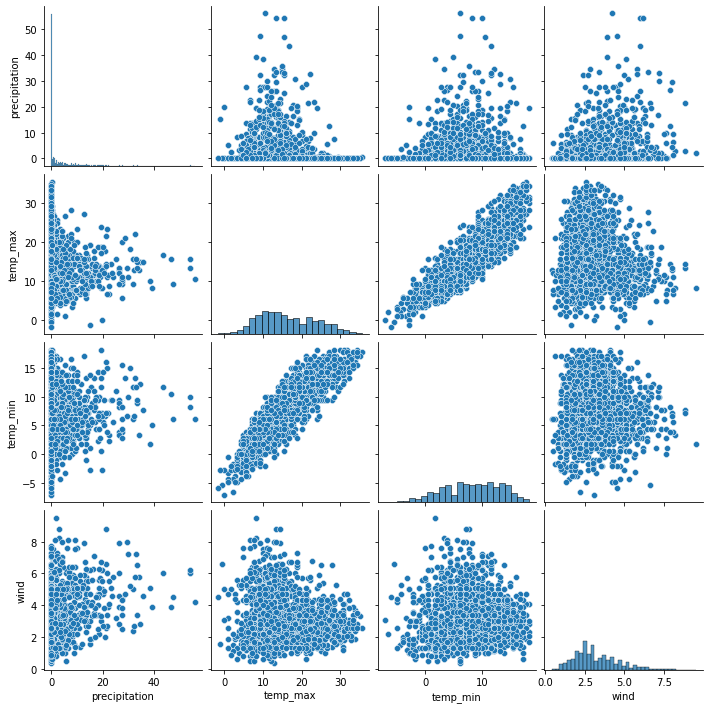

In [22]:
# pairplot for Weather Prediction Dataset
sns.pairplot(weather_dataset)
print('Pairplot for Weather Prediction Dataset')

Pairplot for Weather Prediction Dataset


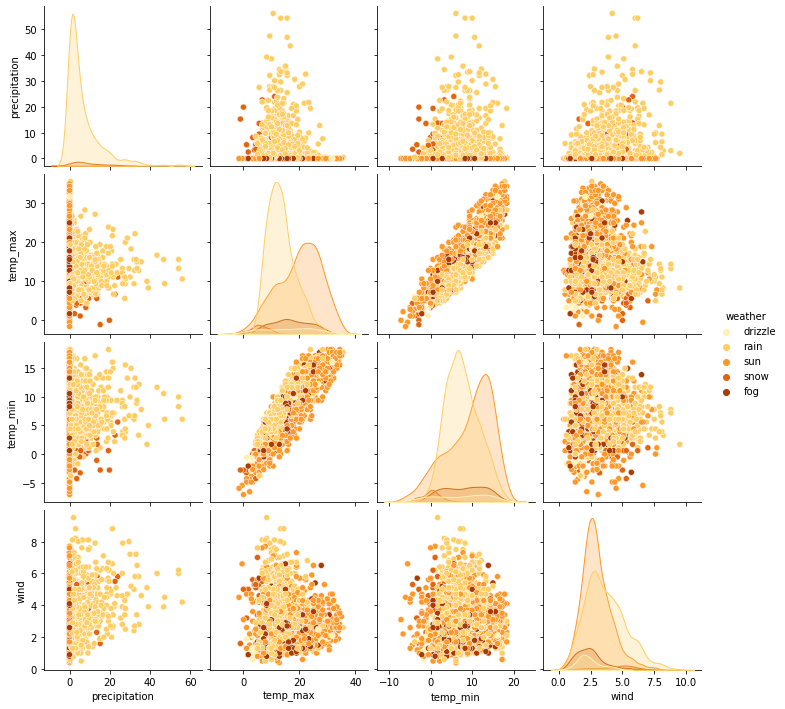

In [23]:
# pairplot for Weather Prediction Dataset
sns.pairplot(weather_dataset, hue='weather',palette="YlOrBr")
print('Pairplot for Weather Prediction Dataset')

Histplot in Weather Prediction Dataset


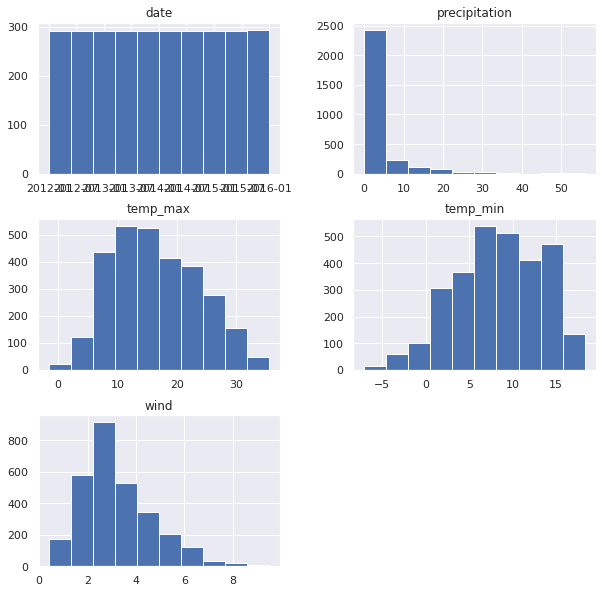

In [24]:
sns.set(style="darkgrid") # hide graph line
weather_dataset.hist(figsize=(10,10))
print('Histplot in Weather Prediction Dataset')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


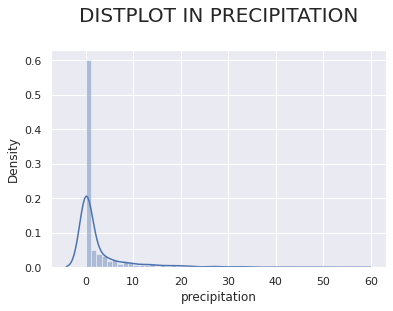

In [25]:
# Precipitation
plt.figure(figsize=(6,4))
sns.distplot(weather_dataset['precipitation'])
title = 'Distplot in Precipitation\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


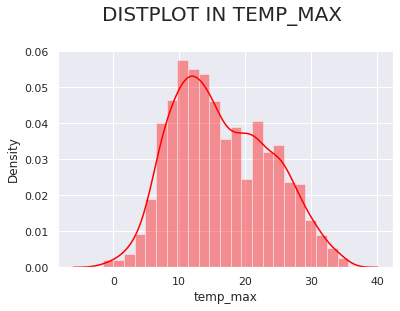

In [26]:
# temp_max 
plt.figure(figsize=(6,4))
sns.distplot(weather_dataset['temp_max'], color='red')
title = 'Distplot in temp_max \n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


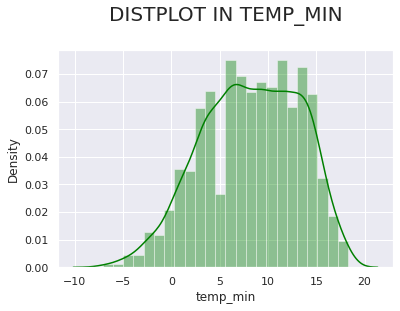

In [27]:
# temp_min 
plt.figure(figsize=(6,4))
sns.distplot(weather_dataset['temp_min'], color='green')
title = 'Distplot in temp_min\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


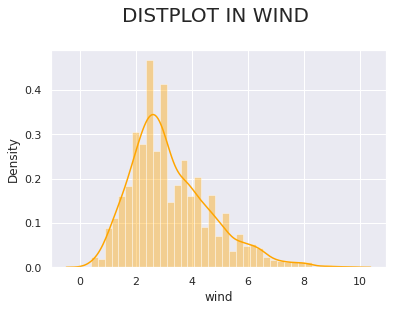

In [28]:
# wind 
plt.figure(figsize=(6,4))
sns.distplot(weather_dataset['wind'], color='orange')
title = 'Distplot in wind \n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

<Figure size 720x360 with 0 Axes>

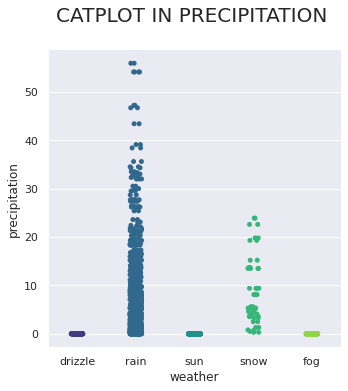

In [29]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather',y ='precipitation',data=weather_dataset,palette = "viridis")
title = 'Catplot in precipitation \n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

<Figure size 720x360 with 0 Axes>

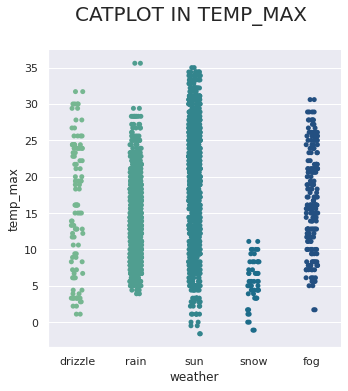

In [30]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather',y ='temp_max',data=weather_dataset,palette="crest")
title = 'Catplot in temp_max \n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

<Figure size 720x360 with 0 Axes>

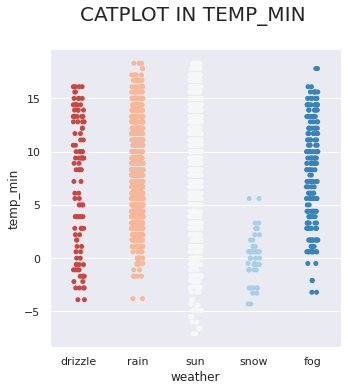

In [31]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather',y ='temp_min',data=weather_dataset,palette = "RdBu")
title = 'Catplot in temp_min \n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

<Figure size 720x360 with 0 Axes>

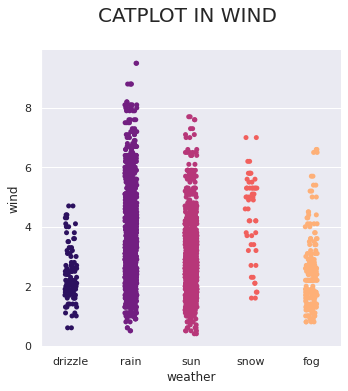

In [32]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather',y ='wind',data=weather_dataset,palette = "magma")
title = 'Catplot in wind \n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

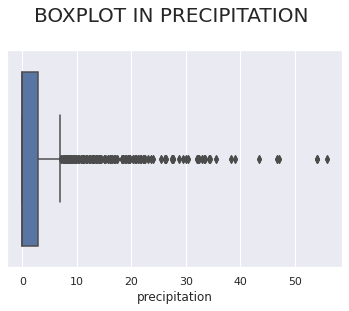

In [33]:
# precipitation Boxplot
sns.boxplot(x=weather_dataset["precipitation"])
title = 'Boxplot in precipitation \n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

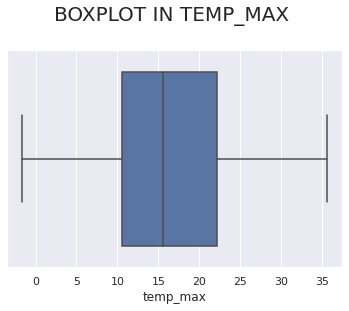

In [34]:
# temp_max Boxplot
sns.boxplot(x=weather_dataset["temp_max"])
title = 'Boxplot in temp_max \n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

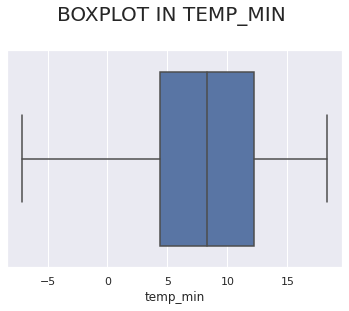

In [35]:
# temp_min Boxplot
sns.boxplot(x=weather_dataset["temp_min"])
title = 'Boxplot in temp_min \n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

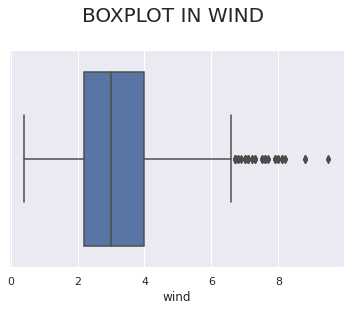

In [36]:
# wind Boxplot
sns.boxplot(x=weather_dataset["wind"])
title = 'Boxplot in wind \n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

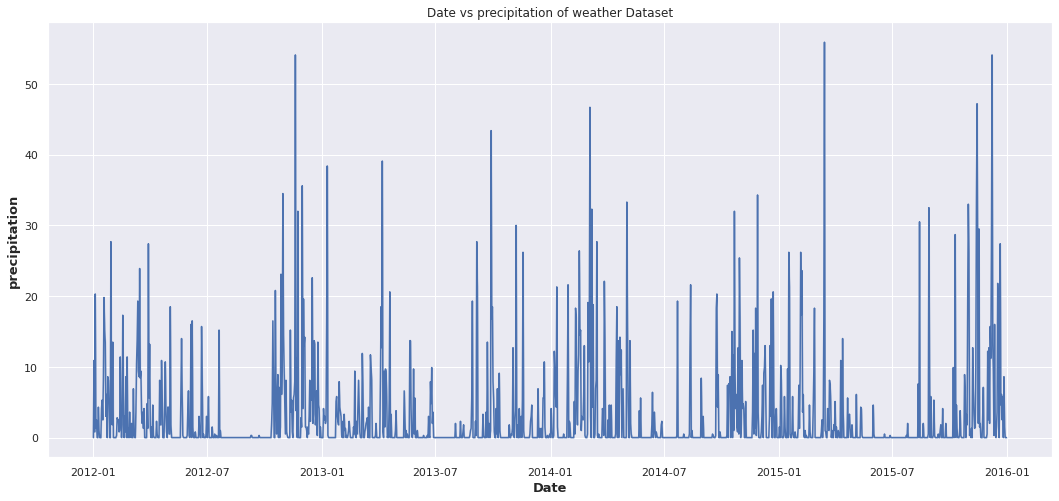

In [37]:
# lineplot
plt.figure(figsize=(18,8))
sns.set_theme()
sns.lineplot(x = 'date',y='precipitation',data=weather_dataset)
plt.xlabel("Date",fontweight='bold',size=13)
plt.ylabel("precipitation",fontweight='bold',size=13)
plt.title('Date vs precipitation of weather Dataset')
plt.show()

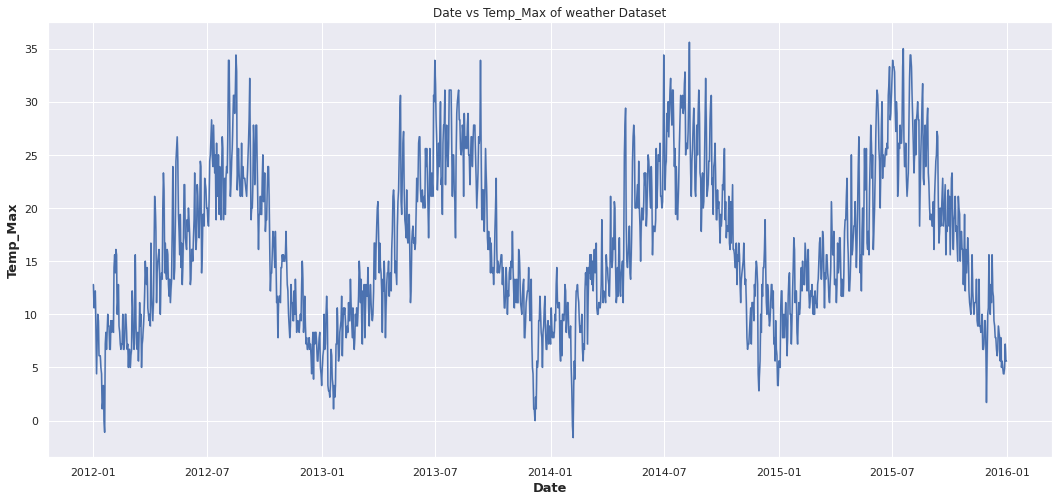

In [38]:
# lineplot
plt.figure(figsize=(18,8))
sns.set_theme()
sns.lineplot(x = 'date',y='temp_max',data=weather_dataset)
plt.xlabel("Date",fontweight='bold',size=13)
plt.ylabel("Temp_Max",fontweight='bold',size=13)
plt.title('Date vs Temp_Max of weather Dataset')
plt.show()

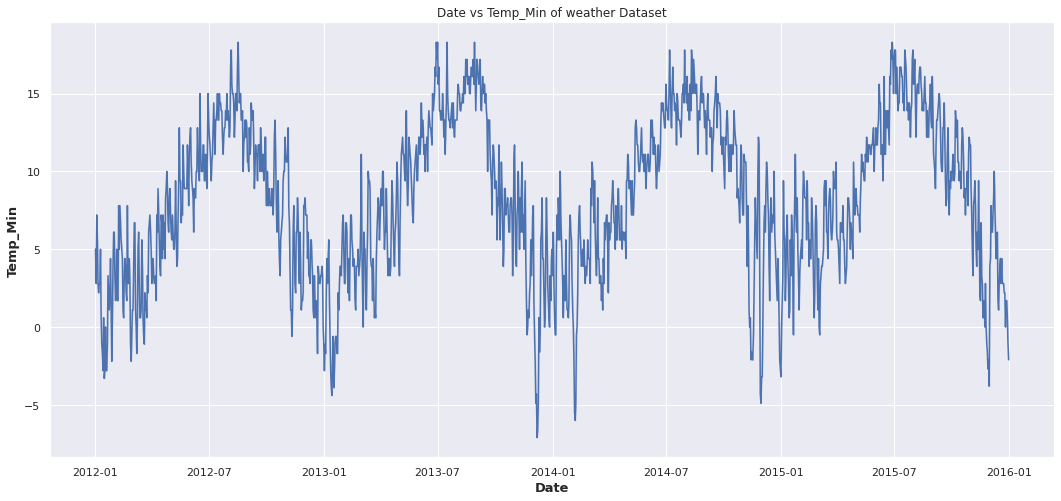

In [39]:
# lineplot
plt.figure(figsize=(18,8))
sns.set_theme()
sns.lineplot(x = 'date',y='temp_min',data=weather_dataset)
plt.xlabel("Date",fontweight='bold',size=13)
plt.ylabel("Temp_Min",fontweight='bold',size=13)
plt.title('Date vs Temp_Min of weather Dataset')
plt.show()

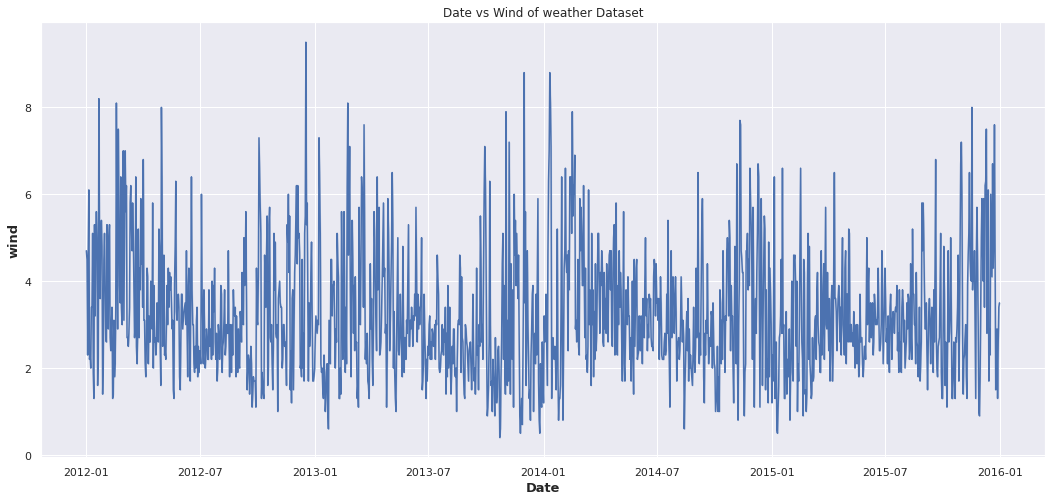

In [40]:
# lineplot
plt.figure(figsize=(18,8))
sns.set_theme()
sns.lineplot(x = 'date',y='wind',data=weather_dataset)
plt.xlabel("Date",fontweight='bold',size=13)
plt.ylabel("wind",fontweight='bold',size=13)
plt.title('Date vs Wind of weather Dataset')
plt.show()

Text(0.5, 1.0, 'Temperature_Max vs Temperature_Min of weather Dataset')

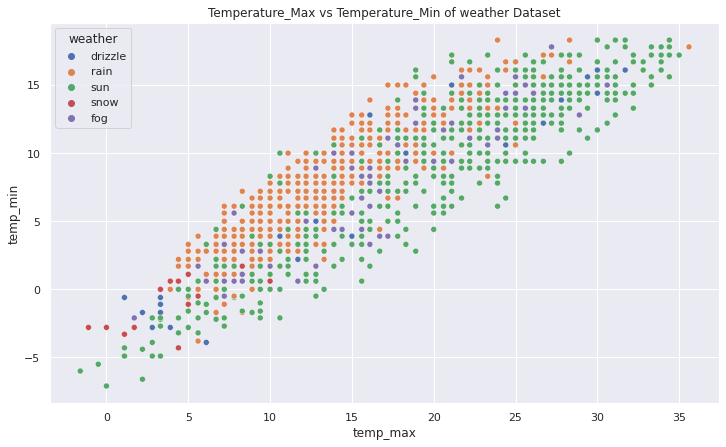

In [41]:
# scatterplot
plt.figure(figsize=(12,7))
axis = sns.scatterplot(x='temp_max',y ='temp_min', data=weather_dataset, hue='weather')
plt.title('Temperature_Max vs Temperature_Min of weather Dataset')

Text(0.5, 1.0, 'precipitation vs wind of weather Dataset')

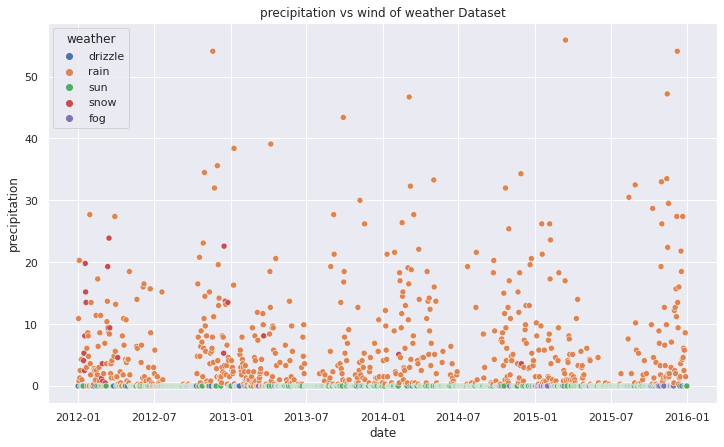

In [42]:
plt.figure(figsize=(12,7))
axis = sns.scatterplot(x='date',y ='precipitation', data=weather_dataset, hue='weather')
plt.title('precipitation vs wind of weather Dataset')

Text(0.5, 1.0, 'Temperature_Max vs wind of weather Dataset')

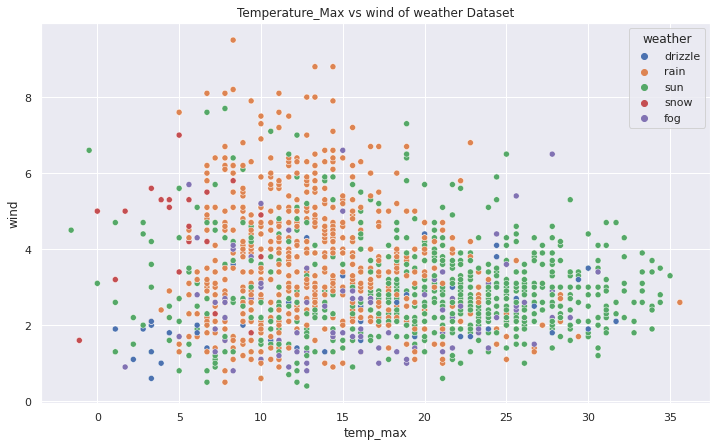

In [43]:
plt.figure(figsize=(12,7))
axis = sns.scatterplot(x='temp_max',y ='wind', data=weather_dataset, hue='weather')
plt.title('Temperature_Max vs wind of weather Dataset')

Text(0.5, 1.0, 'Temperature_Min vs wind of weather Dataset')

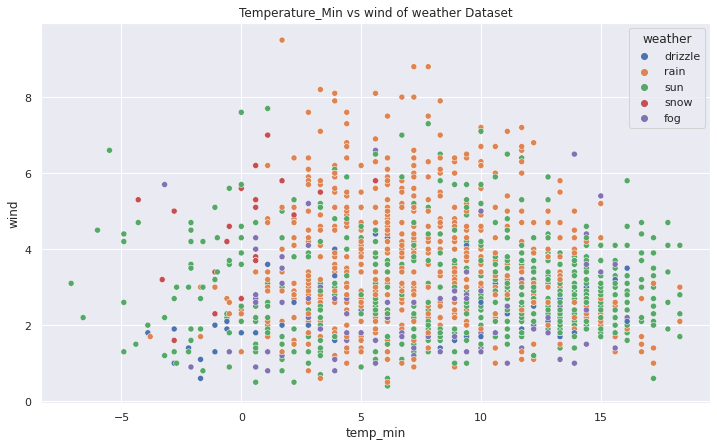

In [44]:
plt.figure(figsize=(12,7))
axis = sns.scatterplot(x='temp_min',y ='wind', data=weather_dataset, hue='weather')
plt.title('Temperature_Min vs wind of weather Dataset')

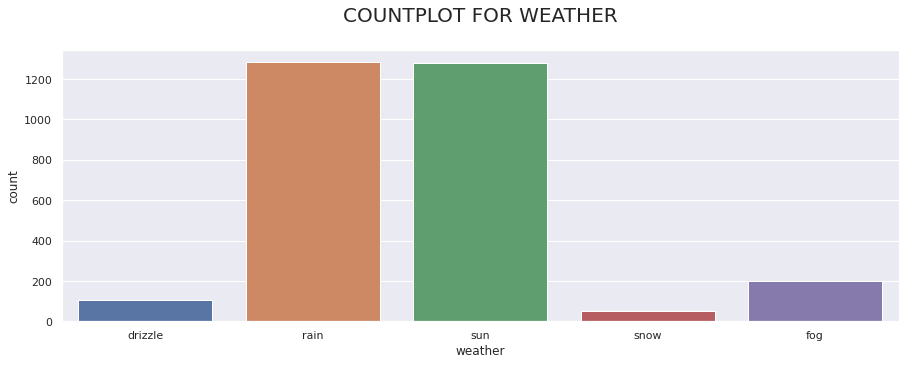

In [45]:
# weather
plt.figure(figsize=(15,5))
sns.countplot(x='weather', data=weather_dataset)
title = 'CountPlot for weather\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

Understanding the correlation between various features in the dataset

In [46]:
correlation = weather_dataset.corr()

In [47]:
print(correlation)

               precipitation  temp_max  temp_min      wind
precipitation       1.000000 -0.228555 -0.072684  0.328045
temp_max           -0.228555  1.000000  0.875687 -0.164857
temp_min           -0.072684  0.875687  1.000000 -0.074185
wind                0.328045 -0.164857 -0.074185  1.000000


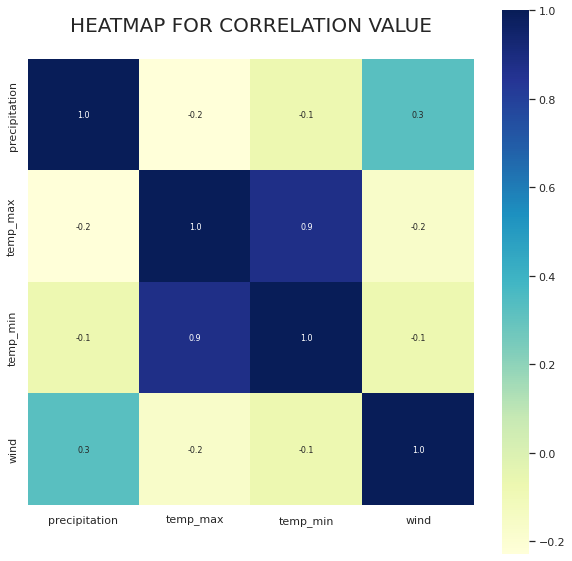

In [48]:
# constructing a beatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='YlGnBu')
title = 'Heatmap for correlation value\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

List of weather

In [49]:
print("Number of various crops: ", len(weather_dataset['weather'].unique()))
print("List of crops: ", weather_dataset['weather'].unique())

Number of various crops:  5
List of crops:  ['drizzle' 'rain' 'sun' 'snow' 'fog']


In [50]:
# Weather column values
weather_dataset['weather'].value_counts()

rain       1282
sun        1280
fog         202
drizzle     106
snow         52
Name: weather, dtype: int64

Label Encoding

In [51]:
encoder = LabelEncoder()

In [52]:
weather_dataset['weather'] = encoder.fit_transform(weather_dataset['weather'])

In [53]:
# weather column values after labelencoding
weather_dataset['weather'].value_counts()

2    1282
4    1280
1     202
0     106
3      52
Name: weather, dtype: int64

In [54]:
weather_dataset.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,2
2,2012-01-03,0.8,11.7,7.2,2.3,2
3,2012-01-04,20.3,12.2,5.6,4.7,2
4,2012-01-05,1.3,8.9,2.8,6.1,2


In [55]:
weather_dataset.tail()

,date,precipitation,temp_max,temp_min,wind,weather
2917,2015-12-27,8.6,4.4,1.7,2.9,2
2918,2015-12-28,1.5,5.0,1.7,1.3,2
2919,2015-12-29,0.0,7.2,0.6,2.6,1
2920,2015-12-30,0.0,5.6,-1.0,3.4,4
2921,2015-12-31,0.0,5.6,-2.1,3.5,4


Splitting the data set

In [56]:
X = weather_dataset.drop(['date', 'weather'], axis=1)
Y = weather_dataset['weather']

In [57]:
print(X)

      precipitation  temp_max  temp_min  wind
0               0.0      12.8       5.0   4.7
1              10.9      10.6       2.8   4.5
2               0.8      11.7       7.2   2.3
3              20.3      12.2       5.6   4.7
4               1.3       8.9       2.8   6.1
...             ...       ...       ...   ...
2917            8.6       4.4       1.7   2.9
2918            1.5       5.0       1.7   1.3
2919            0.0       7.2       0.6   2.6
2920            0.0       5.6      -1.0   3.4
2921            0.0       5.6      -2.1   3.5

[2922 rows x 4 columns]


In [58]:
print(Y)

0       0
1       2
2       2
3       2
4       2
       ..
2917    2
2918    2
2919    1
2920    4
2921    4
Name: weather, Length: 2922, dtype: int64


Splitting the data into Training data & Testing Data

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [60]:
print(X.shape, X_train.shape, X_test.shape)

(2922, 4) (2045, 4) (877, 4)


Machine Learning Model Training

LightGBM Model

In [61]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, Y_train)

LGBMClassifier()

Training Data

In [62]:
lgb_predictions=lgb_model.predict(X_train)
# Accuracy Score
# accuracy_lgb_on_test_data = accuracy_score(Y_train,lgb_predictions)*100
print('Accuracy Score : ', accuracy_score(Y_train,lgb_predictions)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_train, lgb_predictions))

Accuracy Score :  98.58190709046455 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.88      0.93        64
           1       0.97      0.89      0.93       131
           2       1.00      1.00      1.00       909
           3       1.00      1.00      1.00        40
           4       0.97      1.00      0.99       901

    accuracy                           0.99      2045
   macro avg       0.99      0.95      0.97      2045
weighted avg       0.99      0.99      0.99      2045



Testing data

In [63]:
lgb_predictions=lgb_model.predict(X_test)
# Accuracy Score
print('Accuracy Score : ', accuracy_score(Y_test,lgb_predictions)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test, lgb_predictions))

Accuracy Score :  92.13226909920182 

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.57      0.71        42
           1       0.84      0.51      0.63        71
           2       0.98      0.98      0.98       373
           3       1.00      1.00      1.00        12
           4       0.87      0.98      0.92       379

    accuracy                           0.92       877
   macro avg       0.92      0.81      0.85       877
weighted avg       0.92      0.92      0.91       877



In [64]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, lgb_predictions))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, lgb_predictions))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, lgb_predictions))))

Mean_absolute_error:  0.23261117445838084
Mean_squared_error:  0.7366020524515393
Root mean_squared_error:  0.8582552373574771


Random Forest

In [65]:
clf_random_forest=RandomForestClassifier()
clf_random_forest.fit(X_train, Y_train)

RandomForestClassifier()

Train Data

In [66]:
random_forest_text_predictions = clf_random_forest.predict(X_train)
# print('Confusion matrix : \n', confusion_matrix(Y_test,random_forest_text_predictions),'\n')
print('Accuracy Score : ', accuracy_score(Y_train,random_forest_text_predictions)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_train,random_forest_text_predictions))

Accuracy Score :  99.80440097799512 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        64
           1       1.00      0.99      1.00       131
           2       1.00      1.00      1.00       909
           3       1.00      1.00      1.00        40
           4       1.00      1.00      1.00       901

    accuracy                           1.00      2045
   macro avg       1.00      0.99      0.99      2045
weighted avg       1.00      1.00      1.00      2045



Test data

In [67]:
random_forest_text_predictions = clf_random_forest.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,random_forest_text_predictions),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,random_forest_text_predictions)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,random_forest_text_predictions))

Accuracy Score :  94.52679589509692 

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.69      0.79        42
           1       0.92      0.68      0.78        71
           2       0.98      0.99      0.98       373
           3       1.00      1.00      1.00        12
           4       0.92      0.98      0.95       379

    accuracy                           0.95       877
   macro avg       0.95      0.87      0.90       877
weighted avg       0.95      0.95      0.94       877



In [68]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, random_forest_text_predictions))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, random_forest_text_predictions))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, random_forest_text_predictions))))

Mean_absolute_error:  0.15621436716077536
Mean_squared_error:  0.4868871151653364
Root mean_squared_error:  0.6977729682105323


CatBoostClassifier

In [69]:
cat = CatBoostClassifier()
cat.fit(X_train, Y_train)

Learning rate set to 0.082067
0:	learn: 1.4009442	total: 49.5ms	remaining: 49.4s
1:	learn: 1.2540427	total: 52.2ms	remaining: 26.1s
2:	learn: 1.1431248	total: 54.6ms	remaining: 18.2s
3:	learn: 1.0550742	total: 56.5ms	remaining: 14.1s
4:	learn: 0.9809547	total: 58.8ms	remaining: 11.7s
5:	learn: 0.9190710	total: 61.4ms	remaining: 10.2s
6:	learn: 0.8682886	total: 63.8ms	remaining: 9.05s
7:	learn: 0.8225331	total: 66.3ms	remaining: 8.22s
8:	learn: 0.7831210	total: 68.7ms	remaining: 7.56s
9:	learn: 0.7497282	total: 71ms	remaining: 7.03s
10:	learn: 0.7195201	total: 73.5ms	remaining: 6.61s
11:	learn: 0.6945946	total: 75.8ms	remaining: 6.24s
12:	learn: 0.6702512	total: 78.4ms	remaining: 5.95s
13:	learn: 0.6494353	total: 80.8ms	remaining: 5.69s
14:	learn: 0.6310091	total: 83.8ms	remaining: 5.5s
15:	learn: 0.6136325	total: 95.2ms	remaining: 5.85s
16:	learn: 0.5976170	total: 104ms	remaining: 6s
17:	learn: 0.5837300	total: 107ms	remaining: 5.82s
18:	learn: 0.5712780	total: 109ms	remaining: 5.63s
1

In [70]:
cat_pred = cat.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,cat_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,cat_pred)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,cat_pred))

Accuracy Score :  89.39566704675028 

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.24      0.37        42
           1       0.87      0.46      0.61        71
           2       0.98      0.97      0.97       373
           3       1.00      0.92      0.96        12
           4       0.82      0.98      0.89       379

    accuracy                           0.89       877
   macro avg       0.90      0.71      0.76       877
weighted avg       0.90      0.89      0.88       877



In [71]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, cat_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, cat_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, cat_pred))))

Mean_absolute_error:  0.3238312428734322
Mean_squared_error:  1.0672748004561003
Root mean_squared_error:  1.0330899285425739


AdaBoostClassifier

In [72]:
adb = AdaBoostClassifier()
adb.fit(X_train, Y_train)

AdaBoostClassifier()

In [73]:
adb_pred = adb.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,xgb_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,adb_pred)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,adb_pred))

Accuracy Score :  80.38768529076397 

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.25      0.04      0.07        71
           2       0.90      0.95      0.93       373
           3       0.71      0.42      0.53        12
           4       0.74      0.91      0.81       379

    accuracy                           0.80       877
   macro avg       0.52      0.46      0.47       877
weighted avg       0.73      0.80      0.76       877



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [100]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test,adb_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test,adb_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test,adb_pred))))

Mean_absolute_error:  0.556442417331813
Mean_squared_error:  1.7217787913340934
Root mean_squared_error:  1.3121656874549392


XGBClassifier

In [74]:
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

XGBClassifier(objective='multi:softprob')

In [75]:
xgb_pred = xgb.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,xgb_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,xgb_pred)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,xgb_pred))

Accuracy Score :  85.17673888255416 

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.10      0.17        42
           1       1.00      0.03      0.05        71
           2       0.99      0.95      0.97       373
           3       1.00      0.67      0.80        12
           4       0.75      0.99      0.86       379

    accuracy                           0.85       877
   macro avg       0.88      0.55      0.57       877
weighted avg       0.87      0.85      0.81       877



In [76]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, xgb_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, xgb_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, xgb_pred))))

Mean_absolute_error:  0.4572405929304447
Mean_squared_error:  1.4971493728620295
Root mean_squared_error:  1.2235805543003817


LogisticRegression

In [77]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [78]:
log_reg_pred = log_reg.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,log_reg_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,log_reg_pred)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,log_reg_pred))

Accuracy Score :  83.23831242873432 

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.00      0.00      0.00        71
           2       0.97      0.95      0.96       373
           3       0.20      0.08      0.12        12
           4       0.74      0.99      0.85       379

    accuracy                           0.83       877
   macro avg       0.38      0.40      0.38       877
weighted avg       0.73      0.83      0.78       877



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, log_reg_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, log_reg_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, log_reg_pred))))

Mean_absolute_error:  0.49486887115165334
Mean_squared_error:  1.5986316989737743
Root mean_squared_error:  1.264370079910852


GaussianNB

In [80]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [81]:
gnb_pred = gnb.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,gnb_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,gnb_pred)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,gnb_pred))

Accuracy Score :  83.35233751425314 

Classification Report: 
               precision    recall  f1-score   support

           0       0.38      0.07      0.12        42
           1       0.00      0.00      0.00        71
           2       0.99      0.93      0.96       373
           3       0.47      0.58      0.52        12
           4       0.75      0.99      0.85       379

    accuracy                           0.83       877
   macro avg       0.51      0.51      0.49       877
weighted avg       0.77      0.83      0.79       877



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, gnb_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, gnb_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, gnb_pred))))

Mean_absolute_error:  0.49486887115165334
Mean_squared_error:  1.6054732041049031
Root mean_squared_error:  1.2670726909317014


KNeighborsClassifier

In [83]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [84]:
knn_pred = knn.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,knn_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,knn_pred)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,knn_pred))

Accuracy Score :  79.13340935005702 

Classification Report: 
               precision    recall  f1-score   support

           0       0.22      0.14      0.17        42
           1       0.35      0.15      0.22        71
           2       0.90      0.90      0.90       373
           3       0.67      0.33      0.44        12
           4       0.76      0.89      0.82       379

    accuracy                           0.79       877
   macro avg       0.58      0.48      0.51       877
weighted avg       0.76      0.79      0.77       877



In [85]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, knn_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, knn_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, knn_pred))))

Mean_absolute_error:  0.5381984036488028
Mean_squared_error:  1.6214367160775371
Root mean_squared_error:  1.2733564764344418


DecisionTreeClassifier

In [86]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [87]:
dtc_pred = dtc.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,svc_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,dtc_pred)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,dtc_pred))

Accuracy Score :  92.01824401368302 

Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        42
           1       0.69      0.72      0.70        71
           2       0.97      0.99      0.98       373
           3       1.00      1.00      1.00        12
           4       0.92      0.91      0.92       379

    accuracy                           0.92       877
   macro avg       0.87      0.87      0.87       877
weighted avg       0.92      0.92      0.92       877



In [88]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, dtc_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, dtc_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, dtc_pred))))

Mean_absolute_error:  0.2291904218928164
Mean_squared_error:  0.7240592930444698
Root mean_squared_error:  0.8509167368458972


Support Vector Clustering (SVC)

In [89]:
svc = SVC()
svc.fit(X_train, Y_train)

SVC()

In [90]:
svc_pred = svc.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,svc_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,svc_pred)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,svc_pred))

Accuracy Score :  77.87913340935006 

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.00      0.00      0.00        71
           2       0.94      0.84      0.89       373
           3       0.00      0.00      0.00        12
           4       0.68      0.98      0.80       379

    accuracy                           0.78       877
   macro avg       0.32      0.36      0.34       877
weighted avg       0.69      0.78      0.72       877



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [91]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, svc_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, svc_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, svc_pred))))

Mean_absolute_error:  0.6031927023945268
Mean_squared_error:  1.814139110604333
Root mean_squared_error:  1.3468998146129254


In [92]:
# print('Accuracy Score : ', accuracy_score(Y_test,lgb_predictions)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,random_forest_text_predictions)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,cat_pred)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,xgb_pred)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,log_reg_pred)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,gnb_pred)*100,'\n')

# print('Accuracy Score : ', accuracy_score(Y_test,knn_pred)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,dtc_pred)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,svc_pred)*100,'\n')

Accuracy Score :  94.52679589509692 

Accuracy Score :  89.39566704675028 

Accuracy Score :  85.17673888255416 

Accuracy Score :  83.23831242873432 

Accuracy Score :  83.35233751425314 

Accuracy Score :  92.01824401368302 

Accuracy Score :  77.87913340935006 



In [93]:
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

In [94]:
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [96]:
import xgboost
import catboost
MLA = [
    #Ensemble Methods
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),

    catboost.CatBoostClassifier(),

    xgboost.XGBClassifier(),

    lgb.LGBMClassifier(),
    
    #GLM
    linear_model.LogisticRegression(),
    
    #Navies Bayes
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),

    #Trees    
    tree.DecisionTreeClassifier(),
    
    ]

In [97]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    
    
    predicted = alg.fit(X_train, Y_train).predict(X_test)
    # fp, tp, th  = roc_curve(Y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(X_train, Y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(X_test, Y_test), 4)
    # MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(Y_test, predicted)
    # MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(Y_test, predicted)
    # MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)

    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

Learning rate set to 0.082067
0:	learn: 1.4009442	total: 5.08ms	remaining: 5.07s
1:	learn: 1.2540427	total: 9.88ms	remaining: 4.93s
2:	learn: 1.1431248	total: 17.1ms	remaining: 5.67s
3:	learn: 1.0550742	total: 22.9ms	remaining: 5.71s
4:	learn: 0.9809547	total: 28.7ms	remaining: 5.72s
5:	learn: 0.9190710	total: 35.7ms	remaining: 5.92s
6:	learn: 0.8682886	total: 42.9ms	remaining: 6.09s
7:	learn: 0.8225331	total: 49.9ms	remaining: 6.18s
8:	learn: 0.7831210	total: 56.9ms	remaining: 6.26s
9:	learn: 0.7497282	total: 62.2ms	remaining: 6.16s
10:	learn: 0.7195201	total: 64.8ms	remaining: 5.82s
11:	learn: 0.6945946	total: 67.2ms	remaining: 5.53s
12:	learn: 0.6702512	total: 69.6ms	remaining: 5.28s
13:	learn: 0.6494353	total: 72ms	remaining: 5.07s
14:	learn: 0.6310091	total: 74.6ms	remaining: 4.9s
15:	learn: 0.6136325	total: 77.3ms	remaining: 4.75s
16:	learn: 0.5976170	total: 79.7ms	remaining: 4.61s
17:	learn: 0.5837300	total: 82.1ms	remaining: 4.48s
18:	learn: 0.5712780	total: 84.8ms	remaining: 4

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


,MLA Name,MLA Train Accuracy,MLA Test Accuracy
0,RandomForestClassifier,0.9980,0.9475
9,DecisionTreeClassifier,0.9980,0.9247
4,LGBMClassifier,0.9858,0.9213
2,CatBoostClassifier,0.9711,0.8940
3,XGBClassifier,0.8748,0.8518
1,GaussianProcessClassifier,0.8885,0.8335
6,GaussianNB,0.8543,0.8335
5,LogisticRegression,0.8528,0.8324
7,KNeighborsClassifier,0.8557,0.7913
8,SVC,0.7946,0.7788


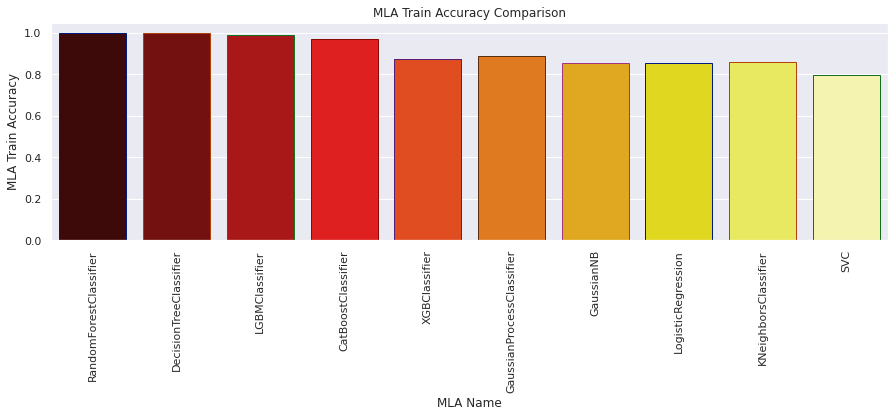

In [98]:
plt.subplots(figsize=(15,4))
sns.barplot(x="MLA Name", y="MLA Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()

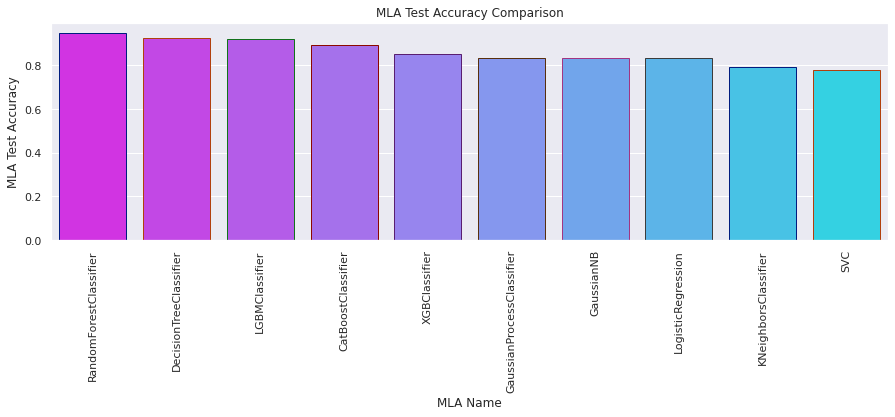

In [99]:
plt.subplots(figsize=(15,4))
sns.barplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='cool_r',edgecolor=sns.color_palette("dark", 8))
plt.xticks(rotation=90)
plt.title('MLA Test Accuracy Comparison')
plt.show()